In [154]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import gc
import seaborn as sns
import collections
from matplotlib.pyplot import figure

color = sns.color_palette()

In [155]:
# reading the data file
data = pd.read_excel("C:/Users/Berke/Coding/arabam.xlsx")

In [156]:
print(data.head()) # printing first 10 row

   id                                              model    price  year  \
0   0                           Ford C-Max 1.6 TDCi Ghia   265000  2006   
1   1    Volkswagen Golf 1.6 TDi BlueMotion Midline Plus   428000  2015   
2   2  BMW 2 Serisi 216d Gran Coupe First Edition M S...  1126000  2020   
3   3                       Toyota C-HR 1.8 Hybrid Flame   685000  2020   
4   4                     Hyundai Accent 1.5 CRDi Admire   137500  2005   

         province           date  
0         Isparta  05 Kasım 2022  
1        İstanbul  05 Kasım 2022  
2         Kocaeli  05 Kasım 2022  
3         Antalya  05 Kasım 2022  
4  Afyonkarahisar  05 Kasım 2022  


In [157]:
print(data.tail()) # printing last 10 row

        id                                model   price  year  province  \
2429  2429                    Opel Kadett 1.6 D   50000  1984     Konya   
2430  2430  Opel Astra 1.3 CDTI Essentia Konfor  295000  2011  İstanbul   
2431  2431     Volkswagen Golf 1.4 TSi Highline  619500  2015   Trabzon   
2432  2432           Ford Fiesta 1.4 TDCi Trend  275000  2012     Konya   
2433  2433                        Fiat Uno 70 S   97000  1996    Manisa   

               date  
2429  05 Kasım 2022  
2430  05 Kasım 2022  
2431  05 Kasım 2022  
2432  05 Kasım 2022  
2433  05 Kasım 2022  


In [158]:
print(data.shape[0]) # There are 2434 rows. So there are 2433 data entries.

2434


In [159]:
print(len(data.model.unique())) # 1232 different models out of 2500 cars

1232


In [160]:
print(len(data.province.unique())) # cars come from 77 different provinces ( Turkey has 81 provinces)

77


In [161]:
temp = data.groupby('model')['id'].count() # How many notices were opened for each model?
print(temp)

model
Alfa Romeo 156 1.6 TS Distinctive                1
Alfa Romeo Giulietta 1.6 JTD Progression Plus    1
Anadol A1                                        2
Anadol Böcek                                     1
Antonio Carraro                                  1
                                                ..
Volvo S90 2.0 B5 Inscription                     2
Volvo XC90 2.0 B5 Inscription                    1
Yamaha MT 125                                    1
Yamaha X City 250                                1
Yamaha YBR 125                                   1
Name: id, Length: 1232, dtype: int64


In [162]:
temp = temp.sort_values(ascending=False)[:20] # Most frequent 20 notices
print(temp)

model
Fiat Egea 1.3 Multijet Easy                         20
Ford Tourneo Courier 1.5 TDCi Delux                 20
Renault Clio 1.5 dCi Joy                            19
Renault Megane 1.5 dCi Touch                        17
Fiat Linea 1.3 Multijet Active Plus                 15
Renault Fluence 1.5 dCi Touch                       15
Renault R 12 Toros                                  15
Ford Focus 1.6 TDCi Trend X                         15
Hyundai Accent Blue 1.6 CRDI Mode                   15
Renault Symbol 1.5 dCi Joy                          15
Renault Symbol 1.5 dCi Authentique                  13
Fiat Fiorino Combi 1.3 Multijet Premio              13
Volkswagen Passat 1.6 TDi BlueMotion Comfortline    13
Honda Civic 1.6 i-VTEC ECO Elegance                 13
Renault Fluence 1.5 dCi Icon                        12
Volkswagen Passat 1.4 TSi BlueMotion Comfortline    12
Volkswagen Jetta 1.6 TDi Comfortline                12
Fiat Fiorino Combi 1.3 Multijet Pop                 11
Rena

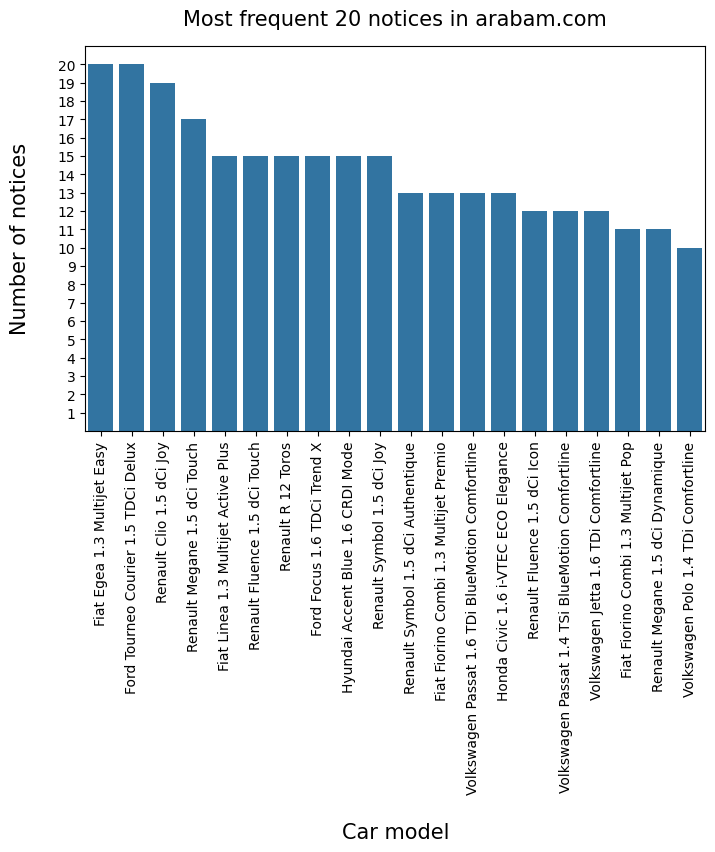

In [163]:
# plotting the above table
fig, ax = plt.subplots(figsize = (8,5))
ax = sns.barplot(x = list(temp.keys()), y = temp.values, color=color[0])
ax.set_title("Most frequent 20 notices in arabam.com", pad=15)
plt.rc('axes', labelsize=15) 
plt.rc('axes', titlesize=15)
plt.xticks(rotation = 90)
plt.yticks(range(1,21))
plt.xlabel("Car model", labelpad=20)
plt.ylabel("Number of notices", labelpad=20)
plt.show()
fig.savefig('Most frequent 20 notices in arabamcom.png', dpi=300, bbox_inches = "tight")

In [164]:
temp = data.groupby('province')['id'].count() # Where these notices come from ?
print(temp)

province
Acil                8
Adana              44
Adıyaman           11
Afyonkarahisar     20
Aksaray             9
                 ... 
Çorum              14
İstanbul          446
İzmir             130
Şanlıurfa          70
Şırnak              2
Name: id, Length: 77, dtype: int64


In [165]:
temp = temp.sort_values(ascending=False)[:20] # 20 most important province.
print(temp)

province
İstanbul      446
Ankara        210
Konya         152
İzmir         130
Bursa          98
Gaziantep      92
Antalya        72
Şanlıurfa      70
Denizli        70
Kocaeli        66
Hatay          61
Kayseri        58
Aydın          54
Osmaniye       47
Muğla          45
Adana          44
Manisa         37
Diyarbakır     36
Mersin         35
Van            32
Name: id, dtype: int64


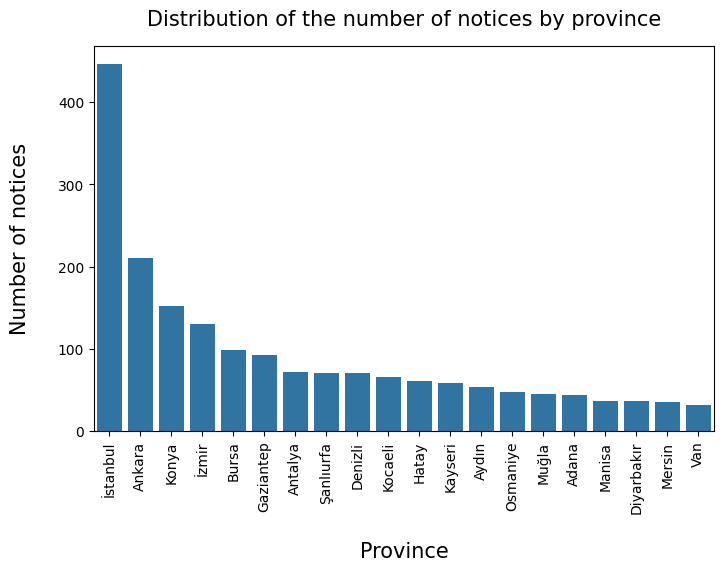

In [166]:
# plotting the above table
fig, ax = plt.subplots(figsize = (8,5))
ax = sns.barplot(x = list(temp.keys()), y = temp.values, color=color[0])
ax.set_title("Distribution of the number of notices by province", pad=15)
plt.rc('axes', labelsize=15) 
plt.rc('axes', titlesize=15)
plt.xticks(rotation = 90)
plt.xlabel("Province", labelpad=20)
plt.ylabel("Number of notices", labelpad=20)
plt.show()
fig.savefig('Distribution of the number of notices by province.png', dpi=300, bbox_inches = "tight")